In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas import Series
def customDescribe(x):
    data = [x.mean(), x.std(), x.min(), x.quantile(0.25), x.median(), 
            x.quantile(0.75), x.max(), x.skew(), x.kurtosis(), x.mode().max(), x.isnull().sum()]
    names = ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis', 'mode', 'NAs']
    return Series(data, index=names)

names = pd.read_csv('columns.csv')
df = pd.read_csv('responses.csv')
music = df.iloc[:,2:18]
music.apply(customDescribe)

Dance      Folk   Country  Classical music   Musical       Pop  \
mean      3.113320  2.288557  2.123383         2.956132  2.761905  3.471698   
std       1.170568  1.138916  1.076136         1.252570  1.260845  1.161400   
min       1.000000  1.000000  1.000000         1.000000  1.000000  1.000000   
25%       2.000000  1.000000  1.000000         2.000000  2.000000  3.000000   
50%       3.000000  2.000000  2.000000         3.000000  3.000000  4.000000   
75%       4.000000  3.000000  3.000000         4.000000  4.000000  4.000000   
max       5.000000  5.000000  5.000000         5.000000  5.000000  5.000000   
skewness -0.045760  0.694783  0.795798         0.107357  0.219951 -0.383317   
kurtosis -0.803331 -0.216416 -0.037576        -0.969287 -0.928080 -0.704309   
mode      3.000000  2.000000  2.000000         3.000000  3.000000  4.000000   
NAs       4.000000  5.000000  5.000000         7.000000  2.000000  3.000000   

              Rock  Metal or Hardrock      Punk  Hiphop, Rap  Reggae, Ska  \
mean      3.761952           2.361470  2.456088     2.910537     2.769691   
std       1.184861           1.372995  1.301105     1.375677     1.214434   
min       1.000000           1.000000  1.000000     1.000000     1.000000   
25%       3.000000           1.000000  1.000000     2.000000     2.000000   
50%       4.000000           2.000000  2.000000     3.000000     3.000000   
75%       5.000000           3.000000  3.000000     4.000000     4.000000   
max       5.000000           5.000000  5.000000     5.000000     5.000000   
skewness -0.702586           0.604915  0.441427     0.037217     0.156497   
kurtosis -0.419187          -0.934732 -0.959379    -1.250059    -0.900509   
mode      5.000000           1.000000  1.000000     4.000000     3.000000   
NAs       6.000000           3.000000  8.000000     4.000000     7.000000   

          Swing, Jazz  Rock n roll  Alternative    Latino  Techno, Trance  
mean         2.759960     3.141575     2.828514  2.842315        2.338983  
std          1.257936     1.237269     1.347173  1.327902        1.324099  
min          1.000000     1.000000     1.000000  1.000000        1.000000  
25%          2.000000     2.000000     2.000000  2.000000        1.000000  
50%          3.000000     3.000000     3.000000  3.000000        2.000000  
75%          4.000000     4.000000     4.000000  4.000000        3.000000  
max          5.000000     5.000000     5.000000  5.000000        5.000000  
skewness     0.146457    -0.108936     0.162211  0.188489        0.569644  
kurtosis    -0.997739    -0.917436    -1.129404 -1.099347       -0.906037  
mode         3.000000     3.000000     3.000000  2.000000        1.000000  
NAs          6.000000     7.000000     7.000000  8.000000        7.000000

In [5]:
music = music.dropna()

In [24]:
df.head(4)

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   

   Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
0      1.0  5.0   5.0                1.0           ...            20.0   
1      2.0  3.0   5.0                4.0           ...            19.0   
2      5.0  3.0   5.0                3.0           ...            20.0   
3      1.0  2.0   2.0                1.0           ...            22.0   

   Height  Weight  Number of siblings  Gender  Left - right handed  \
0   163.0    48.0                 1.0  female         right handed   
1   163.0    58.0                 2.0  female         right handed   
2   176.0    67.0                 2.0  female         right handed   
3   172.0    59.0                 1.0  female         right handed   

                 Education  Only child  Village - town  House - block of flats  
0  college/bachelor degree          no         village          block of flats  
1  college/bachelor degree          no            city          block of flats  
2         secondary school          no            city          block of flats  
3  college/bachelor degree         yes            city          house/bungalow  

[4 rows x 150 columns]

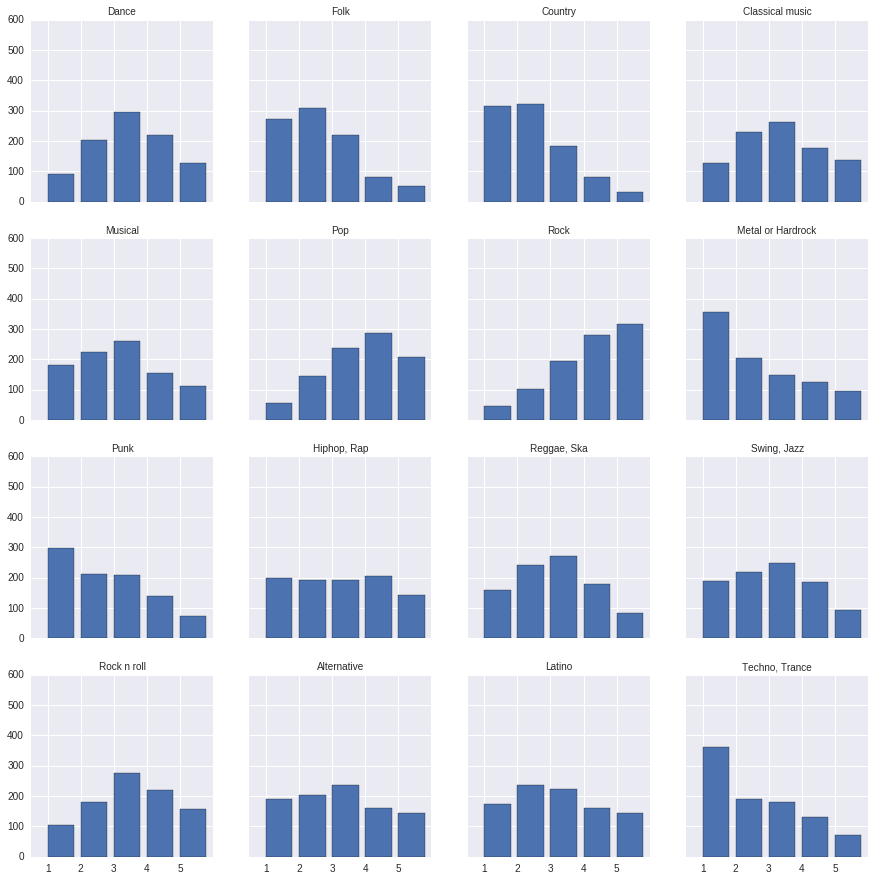

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt_dict = {}

for i in range(0,len(music.columns)):
    plt_dict.update({i:music.columns[i]})

fig, ax = plt.subplots(4,4,figsize=(15,15), sharey=True, sharex=True)
x = [1,2,3,4,5]
initial = 0

for i in range(4):
    for j in range(4):
        y = music[plt_dict[initial]].value_counts().to_dict()
        ax[i,j].bar(y.keys(), y.values())
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xticklabels(labels=np.arange(0,6), fontsize=10)
        ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=10)
        ax[i,j].set_title(plt_dict[initial], fontsize=10)
        ax[i,j].set_xlim(.5,6)
        ax[i,j].set_ylim(0,600)
        initial += 1
plt.show()

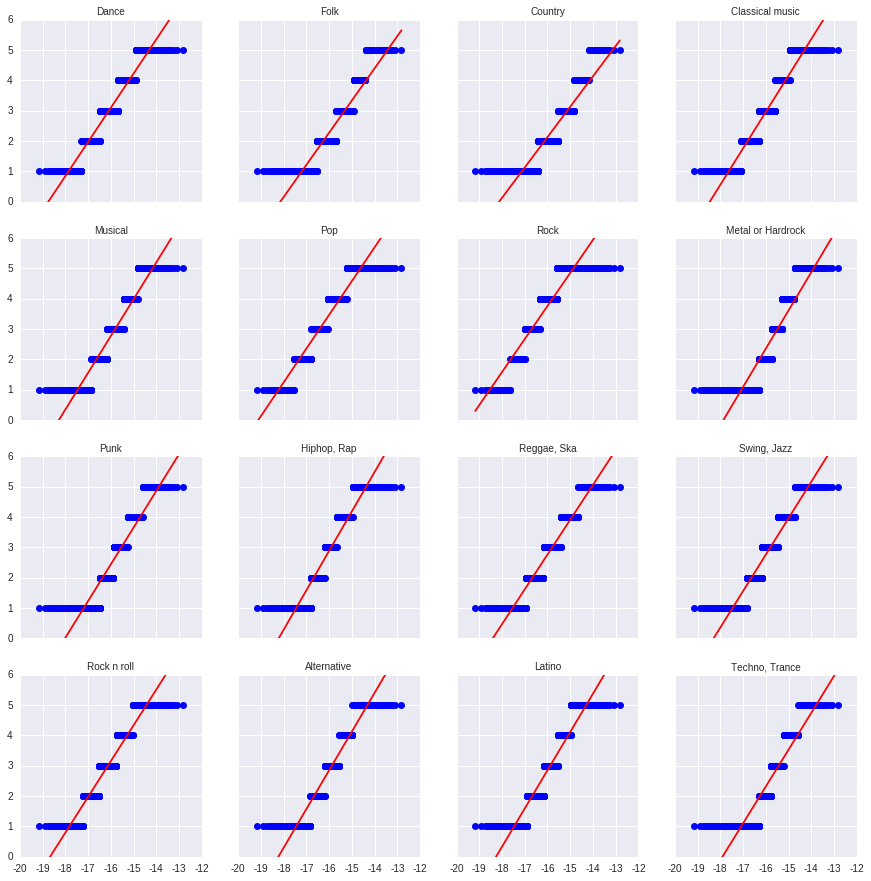

array([  1.73933578e-018,   9.70589103e-015,   9.08852599e-018,
         3.03938325e-039,   1.85007144e-036,   1.81645640e-017,
         1.15204030e-016,   6.09948269e-042,   3.13553153e-039,
         2.84113677e-210,   7.36973614e-024,   2.01589772e-045,
         2.74815258e-029,   1.90506599e-087,   1.42014654e-076,
         2.82482142e-037])

In [38]:
from scipy.stats.mstats import normaltest
from scipy.stats import probplot
import seaborn as sns
import matplotlib.pyplot as plt
plt_dict = {}

for i in range(0,len(music.columns)):
    plt_dict.update({i:music.columns[i]})

fig, ax = plt.subplots(4,4,figsize=(15,15), sharey=True, sharex=True)
x = [1,2,3,4,5]
initial = 0

for i in range(4):
    for j in range(4):
        probplot(music[plt_dict[initial]], plot=ax[i,j])
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xticklabels(labels=np.arange(-20,20), fontsize=10)
        ax[i,j].set_yticklabels(labels=np.arange(0,10,1), fontsize=10)
        ax[i,j].set_title(plt_dict[initial], fontsize=10)
        ax[i,j].set_ylim(0,6)
        
        initial += 1
plt.show()

normaltest(music).pvalue

In [25]:
music['Dance']

0       2.0
1       2.0
2       2.0
3       2.0
4       4.0
5       2.0
6       5.0
7       3.0
9       2.0
10      3.0
11      1.0
12      1.0
13      5.0
14      2.0
15      2.0
16      3.0
17      3.0
18      5.0
19      3.0
20      3.0
21      1.0
23      4.0
24      3.0
25      4.0
26      5.0
27      3.0
28      5.0
29      3.0
30      4.0
31      4.0
       ... 
977     4.0
978     2.0
979     4.0
980     2.0
981     1.0
982     2.0
983     3.0
984     1.0
985     1.0
986     2.0
989     3.0
990     2.0
991     2.0
992     4.0
993     3.0
994     3.0
995     2.0
996     1.0
997     3.0
998     4.0
1000    3.0
1001    5.0
1002    3.0
1003    4.0
1004    4.0
1005    5.0
1006    5.0
1007    1.0
1008    3.0
1009    4.0
Name: Dance, Length: 937, dtype: float64

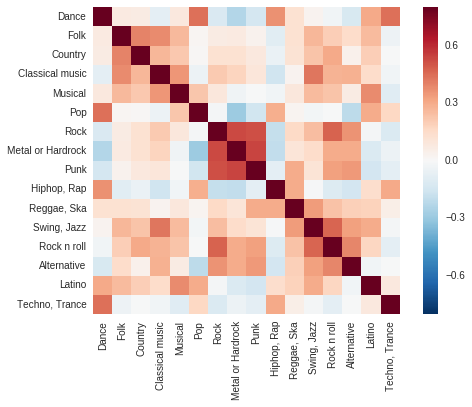

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = music.corr() #попарная корреляция Пиросона 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmax=.8, square=True)
plt.figure(figsize=(16,16))
plt.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis

n_features = len(music.columns)
n_components = np.arange(0, 4)
fa_scores = []
fa = FactorAnalysis()
fa.fit(music)
for n in n_components:
    fa.n_components = n
    fa_scores.append(np.mean(cross_val_score(fa, music)))
n_components_fa = n_components[np.argmax(fa_scores)]
print('Количество факторов: ', n_components_fa)

In [ ]:
factor = FactorAnalysis(n_components=3)
factor.fit(music)
print ((pd.DataFrame(factor.components_,columns=music.columns)).transpose())